In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bonefracutre-bonding-boxes-data/trainfile.csv
/kaggle/input/bonefracutre-bonding-boxes-data/valfile.csv
/kaggle/input/fracture/fracture/validation/20.jpg
/kaggle/input/fracture/fracture/validation/6.jpg
/kaggle/input/fracture/fracture/validation/5.jpg
/kaggle/input/fracture/fracture/validation/8.jpg
/kaggle/input/fracture/fracture/validation/30.jpg
/kaggle/input/fracture/fracture/validation/38.jpg
/kaggle/input/fracture/fracture/validation/33.jpg
/kaggle/input/fracture/fracture/validation/10.jpg
/kaggle/input/fracture/fracture/validation/0.jpg
/kaggle/input/fracture/fracture/validation/35.jpg
/kaggle/input/fracture/fracture/validation/9.jpg
/kaggle/input/fracture/fracture/validation/37.jpg
/kaggle/input/fracture/fracture/validation/1.jpg
/kaggle/input/fracture/fracture/validation/29.jpg
/kaggle/input/fracture/fracture/validation/16.jpg
/kaggle/input/fracture/fracture/validation/23.jpg
/kaggle/input/fracture/fracture/validation/7.jpg
/kaggle/input/fracture/fracture/validat

In [6]:
import numpy as np
import pandas as pd
import os

In [8]:
import random
from PIL import Image, ImageDraw
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import torch
import torchvision
from torchvision import transforms as T
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor


In [9]:
print("HELLO")

HELLO


In [11]:
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [12]:
data = pd.read_csv('/kaggle/input/bonefracutre-bonding-boxes-data/trainfile.csv')
valdata = pd.read_csv('/kaggle/input/bonefracutre-bonding-boxes-data/valfile.csv')

In [13]:
url_img = '/kaggle/input/fracture/fracture/training/'
url_val_img = '/kaggle/input/fracture/fracture/validation/'

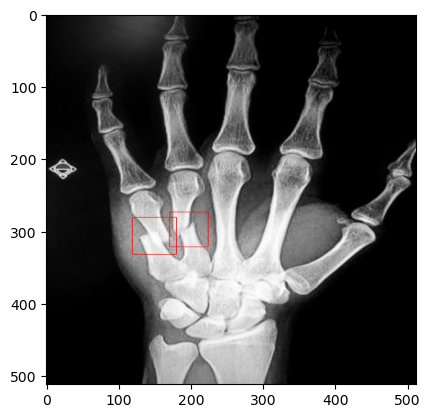

In [14]:
s = '5.jpg'
path = url_img + s
img = cv2.imread(path)
# img =  Image.open(path)
bboxs = data[data['filename']==s]
for index, row in bboxs.iterrows():
    xmin = row['xmin']
    xmax = row['xmax']
    ymin = row['ymin']
    ymax = row['ymax']
    label = row['name']
    cv2.rectangle(img,(xmin,ymin),(xmax, ymax),(255,0,0), 1)
#     font = cv2.FONT_HERSHEY_SIMPLEX
#     cv2.putText(img, label, (xmin+5,ymin+15), font, 0.5, (0,255,0), 1)
img = cv2.resize(img, (512, 512))
# cv2.imshow('image', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.imshow(img)

In [15]:
unique_train_img = data.filename.unique()
unique_val_img = valdata.filename.unique()

In [16]:
train_inds = list(range(unique_train_img.shape[0]) )
val_inds = list(range(unique_val_img.shape[0]) )

In [17]:
class CustDat(torch.utils.data.Dataset):
    def __init__(self, data, unique_imgs, indices):
        self.data = data
        self.unique_imgs = unique_imgs
        self.indices = indices
    def __len__(self):
        return len(self.indices)
    def __getitem__(self, idx):
        image_name = self.unique_imgs[self.indices[idx]]
        boxes = self.data[self.data.filename == image_name].values[:, 9:].astype("float")
        img = Image.open(url_img + image_name).convert("RGB")
        labels = torch.ones((boxes.shape[0]), dtype = torch.int64)
        target = {}
        target['boxes'] = torch.tensor(boxes)
        target['label'] = labels
        return T.ToTensor()(img), target


In [18]:
import warnings
  

warnings.filterwarnings('ignore')

In [19]:
def custom_collate(data):
    return data

In [20]:
train_dl = torch.utils.data.DataLoader(CustDat(data,  unique_train_img, train_inds),
                                      batch_size = 3,
                                      shuffle = True,
                                      collate_fn = custom_collate,
                                      pin_memory = True if torch.cuda.is_available() else False)

val_dl = torch.utils.data.DataLoader(CustDat(valdata,  unique_val_img, val_inds),
                                      batch_size = 5,
                                      shuffle = True,
                                      collate_fn = custom_collate,
                                      pin_memory = True if torch.cuda.is_available() else False)

In [21]:
# for i in train_dl:
#     print(i)
print(len(train_dl), train_dl)
for i in train_dl:
    print(i)

79 <torch.utils.data.dataloader.DataLoader object at 0x7f567c57ca50>
[[tensor([[[0.4039, 0.3922, 0.4314,  ..., 0.3804, 0.3765, 0.3922],
         [0.3255, 0.2667, 0.2941,  ..., 0.3725, 0.3765, 0.3922],
         [0.2863, 0.2471, 0.2863,  ..., 0.3686, 0.3765, 0.3922],
         ...,
         [0.0471, 0.0471, 0.0471,  ..., 0.2039, 0.2000, 0.1882],
         [0.0431, 0.0431, 0.0431,  ..., 0.1922, 0.1843, 0.1725],
         [0.0471, 0.0471, 0.0431,  ..., 0.1961, 0.1686, 0.1725]],

        [[0.4039, 0.3922, 0.4314,  ..., 0.3804, 0.3765, 0.3922],
         [0.3255, 0.2667, 0.2941,  ..., 0.3725, 0.3765, 0.3922],
         [0.2863, 0.2471, 0.2863,  ..., 0.3686, 0.3765, 0.3922],
         ...,
         [0.0471, 0.0471, 0.0471,  ..., 0.2039, 0.2000, 0.1882],
         [0.0431, 0.0431, 0.0431,  ..., 0.1922, 0.1843, 0.1725],
         [0.0471, 0.0471, 0.0431,  ..., 0.1961, 0.1686, 0.1725]],

        [[0.4039, 0.3922, 0.4314,  ..., 0.3804, 0.3765, 0.3922],
         [0.3255, 0.2667, 0.2941,  ..., 0.3725, 0.37

In [22]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained = True)

num_classes = 2

in_features = model.roi_heads.box_predictor.cls_score.in_features

model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


  0%|          | 0.00/160M [00:00<?, ?B/s]

In [23]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [24]:
device

device(type='cuda')

In [25]:
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001, momentum=0.9, weight_decay=0.0005)
num_epochs = 8

In [26]:
model.to(device)
for epochs in range(num_epochs):
    epoch_loss = 0
    print("epochs = ", epochs)
    cnt = 1
    for data in train_dl:
#         print("Running")
        imgs = []
        targets = []
        for d in data:
            imgs.append(d[0].to(device))
            targ = {}
            targ['boxes'] = d[1]["boxes"].to(device)
            targ['labels'] = d[1]["label"].to(device)
            targets.append(targ)
#         print(imgs)
        loss_dict = model(imgs, targets)
        print(loss_dict)
        loss = sum(v for v in loss_dict.values())
        epoch_loss += loss.cpu().detach().numpy()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        print("cnt = ", cnt, "run")
        cnt+=1
    print(epoch_loss)


epochs =  0
{'loss_classifier': tensor(0.5891, device='cuda:0', grad_fn=<NllLossBackward0>), 'loss_box_reg': tensor(0.0188, device='cuda:0', grad_fn=<DivBackward0>), 'loss_objectness': tensor(0.2522, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>), 'loss_rpn_box_reg': tensor(0.0316, device='cuda:0', dtype=torch.float64, grad_fn=<DivBackward0>)}
cnt =  1 run
{'loss_classifier': tensor(0.4376, device='cuda:0', grad_fn=<NllLossBackward0>), 'loss_box_reg': tensor(0.0297, device='cuda:0', grad_fn=<DivBackward0>), 'loss_objectness': tensor(0.1328, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>), 'loss_rpn_box_reg': tensor(0.0067, device='cuda:0', dtype=torch.float64, grad_fn=<DivBackward0>)}
cnt =  2 run
{'loss_classifier': tensor(0.2485, device='cuda:0', grad_fn=<NllLossBackward0>), 'loss_box_reg': tensor(0.0080, device='cuda:0', grad_fn=<DivBackward0>), 'loss_objectness': tensor(0.1587, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWit

In [46]:
model.eval()
data = iter(val_dl).__next__()

(341, 686) (445, 805)


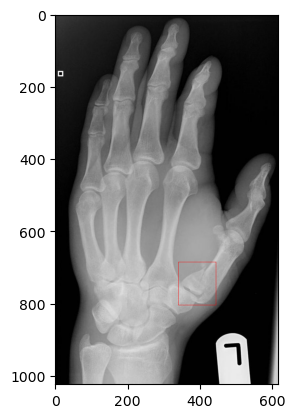

In [96]:
data1 = pd.read_csv('/kaggle/input/bonefracutre-bonding-boxes-data/trainfile.csv')
s = '0.jpg'
path = url_img + s
img = cv2.imread(path)
# img =  Image.open(path)
bboxs = data1[data1['filename']==s]
for index, row in bboxs.iterrows():
    xmin = row['xmin']
    xmax = row['xmax']
    ymin = row['ymin']
    ymax = row['ymax']
    label = row['name']
    print((xmin,ymin),(xmax, ymax))
    cv2.rectangle(img,(xmin,ymin),(xmax, ymax),(255,0,0), 1)
#     font = cv2.FONT_HERSHEY_SIMPLEX
#     cv2.putText(img, label, (xmin+5,ymin+15), font, 0.5, (0,255,0), 1)
# img = cv2.resize(img, (512, 512))
# cv2.imshow('image', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.imshow(img)

99.22022819519043
97.26619124412537


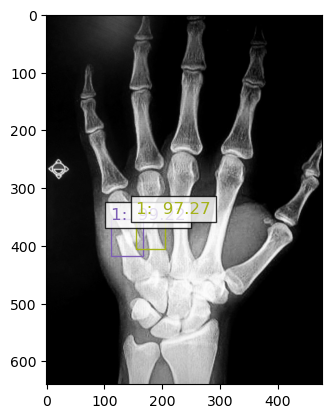

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F

# Select an image from the validation set
# img, target = data[1]
# img = cv2.imread('/kaggle/input/fracture/fracture/training/0.jpg')
img = Image.open('/kaggle/input/fracture/fracture/training/5.jpg')

# Preprocess the image
img = T.ToTensor()(img)
# img = img.unsqueeze(0) 
# print(img)
img = img.to(device)
# print(img)
# Make a prediction
model.eval()
with torch.no_grad():
    output = model([img])

# Extract the predicted boxes, labels and scores from the output
pred_boxes = output[0]['boxes'].detach().cpu().numpy()
pred_labels = output[0]['labels'].detach().cpu().numpy()
pred_scores = output[0]['scores'].detach().cpu().numpy()

# Display the image and the predicted boxes
img = F.to_pil_image(img.cpu())
plt.imshow(img)
ax = plt.gca()
for i in range(len(pred_boxes)):
    if pred_scores[i] > 0.5:  # Only display boxes with confidence > 0.5
        box = pred_boxes[i]
        label = pred_labels[i]
        score = pred_scores[i]
        color = np.random.rand(3)
        ax.add_patch(plt.Rectangle((box[0], box[1]), box[2]-box[0], box[3]-box[1], fill=False, edgecolor=color, linewidth=1))
        score = score * 100
        print(score)
        ax.text(box[0], box[1], f'{label}: {score: .2f}', color=color, fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
plt.show()


In [102]:
from sklearn.metrics import accuracy_score

model.eval()
true_labels = []
predicted_labels = []

for data in val_dl:
    imgs = []
    targets = []
    for d in data:
        imgs.append(d[0].to(device))
        targ = {}
        targ['boxes'] = d[1]["boxes"].to(device)
        targ['labels'] = d[1]["label"].to(device)
        targets.append(targ)
    with torch.no_grad():
        outputs = model(imgs)
    for i in range(len(outputs)):
        true_labels.append(targets[i]['labels'].detach().cpu().numpy())
        predicted_labels.append(outputs[i]['labels'].detach().cpu().numpy())

true_labels = np.concatenate(true_labels)
predicted_labels = np.concatenate(predicted_labels)

# accuracy = accuracy_score(true_labels, predicted_labels)
# print("Accuracy: ", accuracy)


In [103]:
print(true_labels)
print(predicted_labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [104]:
data[0]

[tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]],
 
         [[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]],
 
         [[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]]]),
 {'boxes': tensor([[ 595., 1023.,  657., 1104.]], dtype=torch.float64),
  'label': tensor([1])}]

In [105]:
torch.save(model.state_dict(), '/kaggle/working/model.pt')


In [106]:
model.load_state_dict(torch.load('/kaggle/working/model.pt'))


<All keys matched successfully>

In [34]:
torch.save(model, 'mymodel.pth')

In [1]:
mymodel = torch.load('/kaggle/working/mymodel.pth')

NameError: name 'torch' is not defined

90.32841324806213


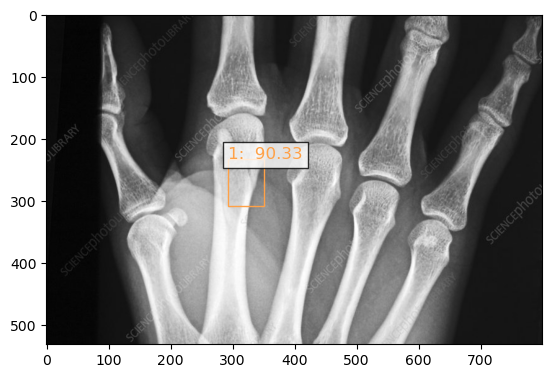

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F

# Select an image from the validation set
# img, target = data[1]
# img = cv2.imread('/kaggle/input/fracture/fracture/training/0.jpg')
img = Image.open('/kaggle/input/fracture/fracture/training/10.jpg')

# Preprocess the image
img = T.ToTensor()(img)
# img = img.unsqueeze(0) 
# print(img)
img = img.to(device)
# print(img)
# Make a prediction
mymodel.eval()
with torch.no_grad():
    output = model([img])

# Extract the predicted boxes, labels and scores from the output
pred_boxes = output[0]['boxes'].detach().cpu().numpy()
pred_labels = output[0]['labels'].detach().cpu().numpy()
pred_scores = output[0]['scores'].detach().cpu().numpy()

# Display the image and the predicted boxes
img = F.to_pil_image(img.cpu())
plt.imshow(img)
ax = plt.gca()
for i in range(len(pred_boxes)):
    if pred_scores[i] > 0.5:  # Only display boxes with confidence > 0.5
        box = pred_boxes[i]
        label = pred_labels[i]
        score = pred_scores[i]
        color = np.random.rand(3)
        ax.add_patch(plt.Rectangle((box[0], box[1]), box[2]-box[0], box[3]-box[1], fill=False, edgecolor=color, linewidth=1))
        score = score * 100
        print(score)
        ax.text(box[0], box[1], f'{label}: {score: .2f}', color=color, fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
plt.show()
